In [5]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Input
from tensorflow.keras.models import Model,Sequential
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import io
import os
from tensorflow.keras.preprocessing.image import img_to_array,load_img
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import load_model
import random
import imutils

import warnings
warnings.filterwarnings('ignore')

In [6]:
file=pd.read_csv(r"C:\Users\Karnati Sai Krishna\Downloads\big_data.v1i.multiclass\train\sample.csv")
print(file)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Project School\\PS3\\big_data.v1i.multiclass\\sample.csv'

In [ ]:
file.head()

,ImageID,LabelName,Confidence,XMin,YMin,XMax,YMax
0,0c0584201ff552c4bdcbe160315aa432_jpg.rf.913795...,lions,1,40,20,88,102
1,0c0584201ff552c4bdcbe160315aa432_jpg.rf.913795...,aadharno,1,167,327,277,348
2,0c0584201ff552c4bdcbe160315aa432_jpg.rf.913795...,govt,1,111,24,358,104
3,0c0584201ff552c4bdcbe160315aa432_jpg.rf.913795...,aadharph,1,36,108,152,290
4,0c0584201ff552c4bdcbe160315aa432_jpg.rf.913795...,Name,1,149,147,290,175


In [ ]:
data=[]
target=[]
filename=[]
images_folder_path=r"D:\Project School\PS3\big_data.v1i.multiclass\train"

In [ ]:
for index,rows in file.iterrows():
    print(index, rows)
    filen,start_x,start_y,end_x,end_y,label=fr'\{rows["ImageID"]}.jpg',rows["XMin"],rows["YMin"],rows["XMax"],rows["YMax"],rows['LabelName']
  
    filename.append(filen)

    image_path=images_folder_path+filen
#     print(image_path)
    image=cv2.imread(image_path)
#     print(image.shape)    
    h,w,_=image.shape
#     assert not isinstance(image,type(None)), 'image not found'

    start_x=start_x/w
    start_y=start_y/h
    end_x=end_x/w
    end_y=end_y/h

    image=load_img(image_path,target_size=(224,224))
    image=img_to_array(image)

    data.append(image)
    target.append((start_x,start_y,end_x,end_y))

0 ImageID       0c0584201ff552c4bdcbe160315aa432_jpg.rf.913795...
LabelName                                                 lions
Confidence                                                    1
XMin                                                         40
YMin                                                         20
XMax                                                         88
YMax                                                        102
Name: 0, dtype: object
1 ImageID       0c0584201ff552c4bdcbe160315aa432_jpg.rf.913795...
LabelName                                              aadharno
Confidence                                                    1
XMin                                                        167
YMin                                                        327
XMax                                                        277
YMax                                                        348
Name: 1, dtype: object
2 ImageID       0c0584201ff552c4bdcbe160315aa432_jpg.r

In [ ]:
data=np.array(data,dtype="float32")/255.0
targets=np.array(target,dtype="float32")


train_images,validation_images,train_targets,validation_targets=train_test_split(data,targets,test_size=0.1,random_state=2022)

In [ ]:
checkpoint_filepath = 'best_weights.hdf5'

earlyStop = EarlyStopping(monitor='val_accuracy', patience=15, 
                        verbose=1, mode='max',restore_best_weights=True)

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                                      save_weights_only=False, 
                                      monitor='val_accuracy',
                                      mode='max', 
                                      save_best_only=True)
learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                                          mode='max',
                                          min_delta=0.03, patience=3, 
                                          factor=.5,
                                          min_lr=0.00001, verbose=1)

callbacks = [earlyStop, checkpoint, learningrate]

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(4,activation="sigmoid"))


opt=Adam(learning_rate=0.0001)
model.compile(loss="mse",optimizer=opt, metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
model.fit(train_images,train_targets,validation_data=(validation_images,validation_targets),batch_size=16,epochs=5,callbacks=callbacks,verbose=1)


Epoch 1/5
1/1 [==============================] - 11s 11s/step - loss: 0.0550 - accuracy: 0.5714 - val_loss: 0.1048 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 0.0539 - accuracy: 0.5714 - val_loss: 0.0914 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 0.0505 - accuracy: 0.5714 - val_loss: 0.0683 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/5
1/1 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.5714
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1/1 [==============================] - 3s 3s/step - loss: 0.0460 - accuracy: 0.5714 - val_loss: 0.0546 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.0480 - accuracy: 0.5714 - val_loss: 0.0679 - val_accuracy: 1.0000 - lr: 5.0000e-05


In [ ]:
model.save('object_detect.hdf5')

In [ ]:
model = load_model('./best_weights.hdf5')

In [ ]:
print('Train data localization:',len(file))

Train data localization: 8


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

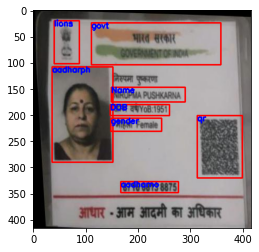

In [ ]:
photo=plt.imread(fr'D:\Project School\PS3\big_data.v1i.multiclass\train\{file.values[0][0]}.jpg')
# plt.imshow(photo)
#   print('Photo shape:',photo.shape)
#   print('Name, LabelName, xmin, xmax, ymin, ymax:',i)
for i in file.values:
  pt1=(int(i[3]),int(i[4]))
  pt2=(int(i[5]),int(i[6]))
  color=(255, 0, 0)
  thickness = 2
  cv2.rectangle(photo,pt1,pt2, color, thickness)
  label = str(i[1])  # Replace with the column name containing labels or names
  cv2.putText(photo, label, (pt1[0], pt1[1] + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
  plt.figure()
plt.imshow(photo)
  